# <font color='#00d2d3'> Text Preprocessing Coachella Tweets 

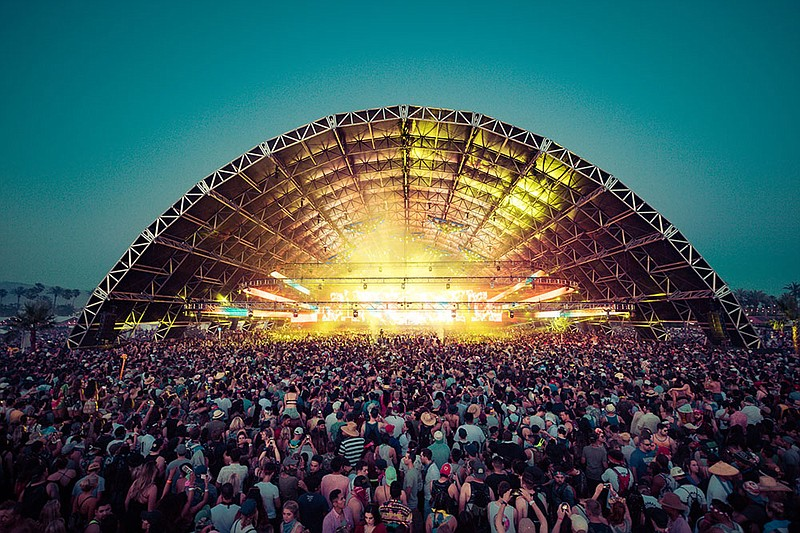


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!gdown --id 1oz1jxsmzY76CD21EdWtIxJLYHhbjAaHK

Downloading...
From: https://drive.google.com/uc?id=1oz1jxsmzY76CD21EdWtIxJLYHhbjAaHK
To: /content/Coachella-2015-2-DFE.csv
100% 656k/656k [00:00<00:00, 43.4MB/s]


<font color='#00d2d3'> Sometimes your dataset may not load, because some text fields contain garbage-encoding errors. Simple choose an encoding; like Latin1 because it accepts any possible byte as input (and convert it to the unicode character of same code). 

In [ ]:
df = pd.read_csv('Coachella-2015-2-DFE.csv', encoding="latin1")
df.head()

coachella_sentiment  ... user_timezone
0            positive  ...         Quito
1            positive  ...           NaN
2            positive  ...           NaN
3            positive  ...         Quito
4            positive  ...           NaN

[5 rows x 10 columns]

<font color='#00d2d3'> Explore Tweets from the 'text' Column: 

In [ ]:
df['text'][1]

'RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ´_ÙÓ´_ÙÓ´ #Coachella2015 http://t.co/Ov2eCJtAvR'

In [ ]:
df['text'][2]

'#Coachella2015 #VIP passes secured! See you there bitchesssss'

In [ ]:
df['text'][3]

'Philly\x89Ûªs @warondrugsjams will play #Coachella2015 &amp; #GovBall2015! Watch them on Jimmy Fallon: http://t.co/wzaAE5wYNT http://t.co/sFL9I5sD20'

##<font color='#1dd1a1'>Begin Tweet Cleaning
<font color='#00cec9'>Review Regex lectures or visit Regex Cheatsheet for assistance [CheatSheet](http://www.rexegg.com/regex-quickstart.html)<br>Find all the Hashtags within Tweet

In [ ]:
def hashtags(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

In [ ]:
text = ""
def hashtags(text):
  hash = re.findall(r"#(\w+)", text)
  return hash


In [ ]:
sampletweet = '#covid2020 #vaccines are being made #2020'
hash = re.findall(r"#(\w+)", sampletweet)
print(hash)

[]


<font color='#00cec9'>Remove Retweet Username & Tweeted at @username

In [ ]:
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) 
    # remove tweeted at
    return tweet

In [ ]:
sampletweet = '@twitteruser I love Game of Thrones!'
tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', sampletweet) 
print(tweet)

 I love Game of Thrones! 


<font color='#00d2d3'>Remove links

In [ ]:
  def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

In [ ]:
def clean_html(text):
  html = re.compile('<.*?>')#regex
  return html.sub(r'',text)

<font color='#00cec9'>Remove non-ascii chars; you can skip this step if you intend to do translations; Example Arabic - English. 

In [ ]:
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

<font color='#00cec9'> Stopwords

In [ ]:
def removeStopWords(str):
#select english stopwords
  cachedStopWords = set(stopwords.words("english"))
#add custom words
  cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))
#remove stop words
  new_str = ' '.join([word for word in str.split() if word not in cachedStopWords]) 
  return new_str

<font color='#00cec9'>Email addresses, using Regex. 

In [ ]:
def email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'',text)

def punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text 

In [ ]:
def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

In [ ]:
df['hashtag'] = df.text.apply(func = hashtags)
df['new_tweet'] = df.text.apply(func = remove_users)
df['new_tweet'] = df.text.apply(func = clean_html)
df['new_tweet'] = df.text.apply(func = non_ascii)
df['new_tweet'] = df.text.apply(func = lower)
df['new_tweet'] = df.new_tweet.apply(func = email_address)
df['new_tweet'] = df.new_tweet.apply(func = removeStopWords)
df['new_tweet'] = df.new_tweet.apply(func = clean_html)
df['new_tweet'] = df.new_tweet.apply(func = punct)


In [ ]:
df.head()

coachella_sentiment  ...                                          new_tweet
0            positive  ...  coachella2015 tickets selling less 40 minutes ...
1            positive  ...  rt sudsybuddy wait absolute fire _ùó _ùó _ùó c...
2            positive  ...   coachella2015 vip passes secured see bitchesssss
3            positive  ...  philly ûªs warondrugsjams play coachella2015 a...
4            positive  ...       briana mom coachella2015 im _ù ý_ù ý_ù ý_ùõä

[5 rows x 12 columns]

In [ ]:
df['new_tweet'][0]

'coachella2015 tickets selling less 40 minutes _ù_ _ù___ù___ù _ùîµ_ùîµ_ù___ù_ http t co smoxyteimj'

In [ ]:
df['new_tweet'] = df.new_tweet.apply(func = remove_special_characters)

In [ ]:
df['new_tweet'][0]

'coachella2015 tickets selling less 40 minutes __ _______ _______ co smoxyteimj'

In [ ]:
df['new_tweet'] = df.new_tweet.apply(func = removeStopWords)

In [ ]:
df['new_tweet'][0]

'coachella2015 tickets selling less 40 minutes __ _______ _______ co smoxyteimj'

In [ ]:
df['new_tweet'] = df.new_tweet.apply(func = remove_digits)

In [ ]:
df['new_tweet'][0]

'coachella tickets selling less  minutes __ _______ _______ co smoxyteimj'

In [ ]:
df.head()

coachella_sentiment  ...                                          new_tweet
0            positive  ...  coachella tickets selling less  minutes __ ___...
1            positive  ...  rt sudsybuddy wait absolute fire _ _ _ coachel...
2            positive  ...       coachella vip passes secured see bitchesssss
3            positive  ...  philly s warondrugsjams play coachella amp gov...
4            positive  ...                    briana mom coachella im _ _ _ _

[5 rows x 12 columns]